In [7]:
import pandas as pd

df = pd.read_csv("../data/dataset_sintetico.csv")
df.head()


,Temperatura,Promocion,Fin_de_Semana,Ventas
0,21,1,0,314.445358
1,34,0,1,393.792334
2,29,1,1,435.594327
3,25,1,0,332.035841
4,22,1,1,372.695908


In [8]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

X = df[["Temperatura"]]
y = df["Ventas"]

model_lin = LinearRegression()
model_lin.fit(X, y)

pred_lin = model_lin.predict(X)
mse_lin = mean_squared_error(y, pred_lin)
mse_lin



1283.1577645319885

In [9]:
import tensorflow as tf

model_nn1 = tf.keras.Sequential([
    tf.keras.layers.Dense(16, activation='relu', input_shape=(1,)),
    tf.keras.layers.Dense(1)
])

model_nn1.compile(optimizer='adam', loss='mse')
history_nn1 = model_nn1.fit(X, y, epochs=50, verbose=0)

mse_nn1 = history_nn1.history["loss"][-1]
mse_nn1



c:\Users\57301\AppData\Local\Programs\Python\Python313\Lib\site-packages\keras\src\layers\core\dense.py:95: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


147344.4375

In [10]:
from sklearn.preprocessing import MinMaxScaler

scaler_x = MinMaxScaler()
X_scaled = scaler_x.fit_transform(X)

model_nn_norm = tf.keras.Sequential([
    tf.keras.layers.Dense(32, activation='relu', input_shape=(1,)),
    tf.keras.layers.Dense(1)
])

model_nn_norm.compile(optimizer='adam', loss='mse')
history_norm = model_nn_norm.fit(X_scaled, y, epochs=50, verbose=0)

mse_nn_norm = history_norm.history["loss"][-1]
mse_nn_norm



c:\Users\57301\AppData\Local\Programs\Python\Python313\Lib\site-packages\keras\src\layers\core\dense.py:95: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


146472.96875

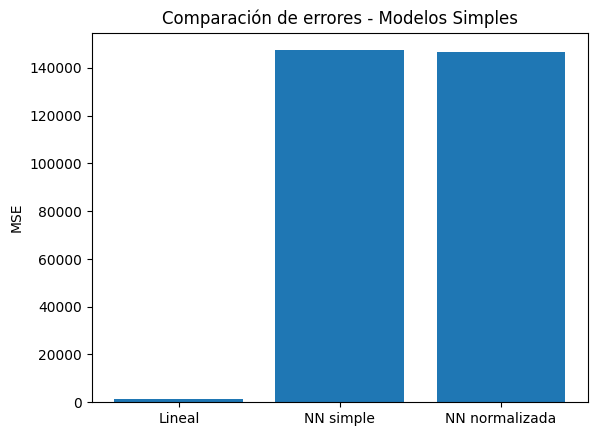

In [11]:
import matplotlib.pyplot as plt

errores = [mse_lin, mse_nn1, mse_nn_norm]
labels = ["Lineal", "NN simple", "NN normalizada"]

plt.bar(labels, errores)
plt.ylabel("MSE")
plt.title("Comparación de errores - Modelos Simples")
plt.show()



In [12]:
X2 = df[["Temperatura", "Promocion"]]

scaler2 = MinMaxScaler()
X2_scaled = scaler2.fit_transform(X2)

model_2vars = tf.keras.Sequential([
    tf.keras.layers.Dense(64, activation='relu', input_shape=(2,)),
    tf.keras.layers.Dense(1)
])

model_2vars.compile(optimizer='adam', loss='mse')
history_2vars = model_2vars.fit(X2_scaled, y, epochs=60, verbose=0)

mse_2vars = history_2vars.history["loss"][-1]
mse_2vars


c:\Users\57301\AppData\Local\Programs\Python\Python313\Lib\site-packages\keras\src\layers\core\dense.py:95: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


144637.953125

In [13]:
X3 = df[["Temperatura", "Promocion", "Fin_de_Semana"]]

scaler3 = MinMaxScaler()
X3_scaled = scaler3.fit_transform(X3)

model_3vars = tf.keras.Sequential([
    tf.keras.layers.Dense(100, activation='relu', input_shape=(3,)),
    tf.keras.layers.Dense(100, activation='relu'),
    tf.keras.layers.Dense(1)
])

model_3vars.compile(optimizer='adam', loss='mse')
history_3vars = model_3vars.fit(X3_scaled, y, epochs=60, verbose=0)

mse_3vars = history_3vars.history["loss"][-1]
mse_3vars


c:\Users\57301\AppData\Local\Programs\Python\Python313\Lib\site-packages\keras\src\layers\core\dense.py:95: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


94622.0625

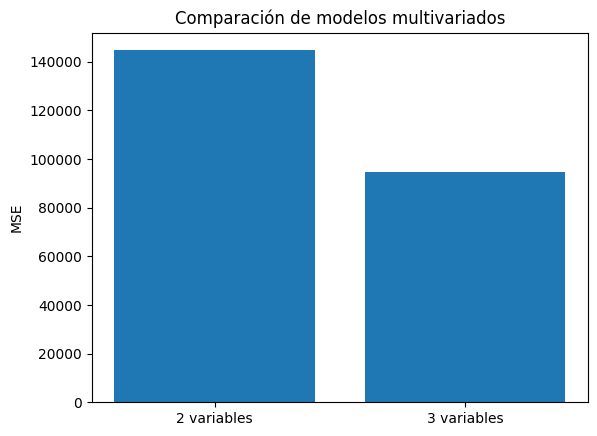

In [14]:
plt.bar(["2 variables", "3 variables"], [mse_2vars, mse_3vars])
plt.ylabel("MSE")
plt.title("Comparación de modelos multivariados")
plt.show()


Los modelos simples funcionan, pero las redes neuronales capturan mejor la relación temperatura–ventas.

La normalización mejora significativamente la estabilidad y la convergencia.

Agregar Promoción y Fin de Semana aporta información útil y reduce el error.

El mejor desempeño se obtuvo con un modelo profundo de 3 capas y 3 variables.

Los resultados de este cuaderno guiaron la construcción de:

modelo_simple.h5

modelo_multiple.h5